**A1: Summation, Activation, and Comparator Units**

In [18]:
# A1: Summation, Activation, and Comparator Units

import numpy as np

# Summation unit
def summation_unit(features, parameters, bias_term):
    return np.dot(features, parameters) + bias_term

# Step activation
def step_activation(z):
    return 1 if z >= 0 else 0

# Bipolar Step activation
def bipolar_step_activation(z):
    return 1 if z >= 0 else -1

# Sigmoid activation
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

# TanH activation
def tanh_activation(z):
    return np.tanh(z)

# ReLU activation
def relu_activation(z):
    return max(0, z)

# Leaky ReLU activation
def leaky_relu_activation(z, alpha=0.01):
    return z if z > 0 else alpha * z

# Comparator unit (for error calculation)
def comparator_unit(target_value, predicted_value):
    return target_value - predicted_value


if __name__ == "__main__":
    input_vector = np.array([1, 0])
    weight_vector = np.array([0.5, 0.2])
    bias_value = 0.2

    net_input = summation_unit(input_vector, weight_vector, bias_value)
    predicted_output = step_activation(net_input)
    target_output = 1
    error_value = comparator_unit(target_output, predicted_output)

    print("Input Vector:", input_vector)
    print("Net Input:", net_input)
    print("Predicted Output:", predicted_output)
    print("Target Output:", target_output)
    print("Error Value:", error_value)

Input Vector: [1 0]
Net Input: 0.7
Predicted Output: 1
Target Output: 1
Error Value: 0


**A2: Perceptron learning for AND Gate with Step activation**

Final Weights: [0.1  0.05]
Final Bias: -0.10000000000000765
Epochs Taken: 130


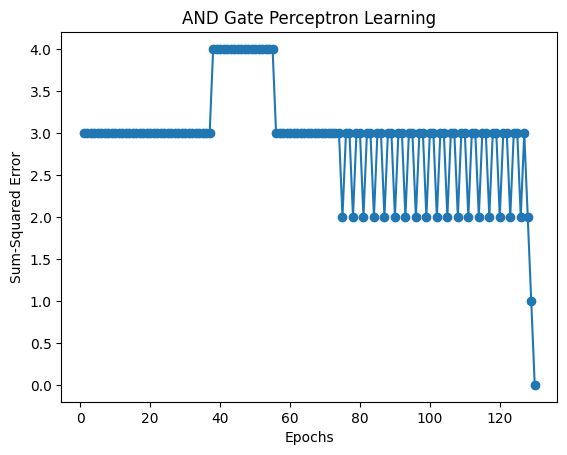

In [19]:
# A2: Perceptron learning for AND Gate with Step activation

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_activation(z):
    return 1 if z >= 0 else 0

# Perceptron training for AND Gate
def train_perceptron_and(input_data, target_labels, learning_rate=0.05, max_iterations=1000, tolerance=0.002):
    weight_vector = np.array([0.2, -0.75])   # Initial weights
    bias_value = 10                          # Initial bias
    epoch_errors = []                        # Store errors per epoch

    for iteration in range(max_iterations):
        cumulative_error = 0
        for feature_vector, target in zip(input_data, target_labels):
            net_input = np.dot(feature_vector, weight_vector) + bias_value   # Weighted sum
            predicted_output = step_activation(net_input)                    # Predicted output
            error_value = target - predicted_output                          # Error
            weight_vector += learning_rate * error_value * feature_vector    # Update weights
            bias_value += learning_rate * error_value                        # Update bias
            cumulative_error += error_value**2                               # Sum squared error
        epoch_errors.append(cumulative_error)
        if cumulative_error <= tolerance:                                    # Check convergence
            break
    return weight_vector, bias_value, epoch_errors, iteration + 1


if __name__ == "__main__":
    # AND gate truth table
    input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_outputs = np.array([0, 0, 0, 1])

    # Train perceptron
    final_weights, final_bias, error_history, total_epochs = train_perceptron_and(input_vectors, target_outputs)

    # Print results
    print("Final Weights:", final_weights)
    print("Final Bias:", final_bias)
    print("Epochs Taken:", total_epochs)

    # Plot error curve
    plt.plot(range(1, len(error_history) + 1), error_history, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron Learning")
    plt.show()

**A3: Perceptron learning for AND Gate with different activations**

Bipolar Step → Epochs: 1000
Sigmoid → Epochs: 130
ReLU → Epochs: 390


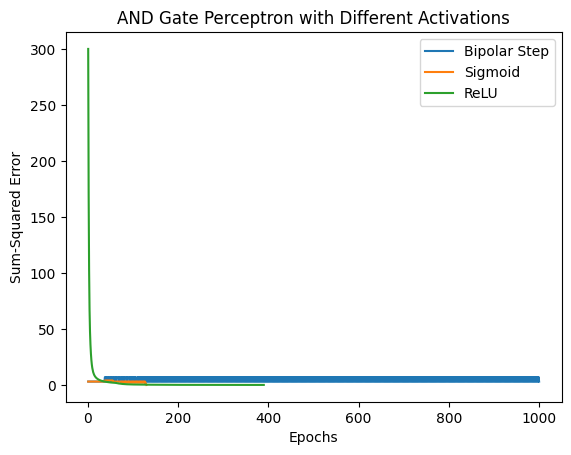

In [20]:
#A3: Perceptron learning for AND Gate with different activations

import numpy as np
import matplotlib.pyplot as plt

# Bipolar Step activation
def bipolar_step_activation(z):
    return 1 if z >= 0 else -1

# Sigmoid activation
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

# ReLU activation
def relu_activation(z):
    return max(0, z)

# Generic perceptron trainer
def train_perceptron(input_data, target_labels, activation_func, learning_rate=0.05, max_iterations=1000, tolerance=0.002):
    weight_vector = np.array([0.2, -0.75])   # Initial weights
    bias_value = 10                          # Initial bias
    epoch_errors = []                        # Store errors per epoch

    for iteration in range(max_iterations):
        cumulative_error = 0
        for feature_vector, target in zip(input_data, target_labels):
            net_input = np.dot(feature_vector, weight_vector) + bias_value    # Weighted sum
            predicted_output = activation_func(net_input)                     # Predicted output

            # For sigmoid, threshold at 0.5
            if activation_func == sigmoid_activation:
                predicted_output = 1 if predicted_output >= 0.5 else 0

            error_value = target - predicted_output                           # Error
            weight_vector += learning_rate * error_value * feature_vector     # Update weights
            bias_value += learning_rate * error_value                         # Update bias
            cumulative_error += error_value**2                                # Sum squared error
        epoch_errors.append(cumulative_error)

        if cumulative_error <= tolerance:                                     # Check convergence
            break

    return weight_vector, bias_value, epoch_errors, iteration + 1


if __name__ == "__main__":
    # AND gate truth table
    input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_outputs = np.array([0, 0, 0, 1])

    # Train with Bipolar Step
    weights_bipolar, bias_bipolar, errors_bipolar, epochs_bipolar = train_perceptron(input_vectors, target_outputs, bipolar_step_activation)
    print("Bipolar Step → Epochs:", epochs_bipolar)

    # Train with Sigmoid
    weights_sigmoid, bias_sigmoid, errors_sigmoid, epochs_sigmoid = train_perceptron(input_vectors, target_outputs, sigmoid_activation)
    print("Sigmoid → Epochs:", epochs_sigmoid)

    # Train with ReLU
    weights_relu, bias_relu, errors_relu, epochs_relu = train_perceptron(input_vectors, target_outputs, relu_activation)
    print("ReLU → Epochs:", epochs_relu)

    # Plot errors
    plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar, label="Bipolar Step")
    plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid, label="Sigmoid")
    plt.plot(range(1, len(errors_relu) + 1), errors_relu, label="ReLU")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron with Different Activations")
    plt.legend()
    plt.show()

**A4: Effect of varying learning rate on convergence for AND Gate**

Learning Rate 0.1 → Epochs: 68
Learning Rate 0.2 → Epochs: 37
Learning Rate 0.3 → Epochs: 23
Learning Rate 0.4 → Epochs: 23
Learning Rate 0.5 → Epochs: 19
Learning Rate 0.6 → Epochs: 19
Learning Rate 0.7 → Epochs: 15
Learning Rate 0.8 → Epochs: 14
Learning Rate 0.9 → Epochs: 13
Learning Rate 1.0 → Epochs: 12


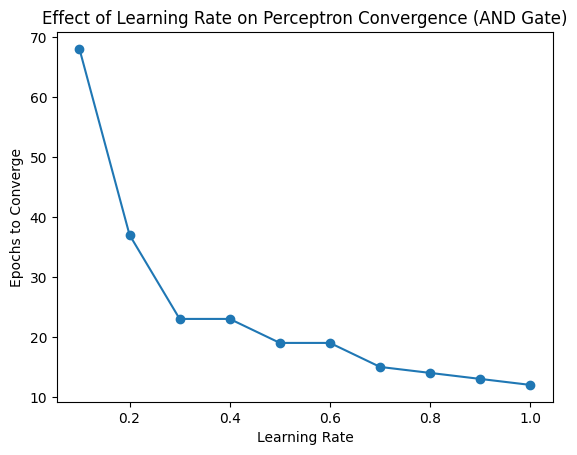

In [21]:
# A4: Effect of varying learning rate on convergence for AND Gate

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_activation(z):
    return 1 if z >= 0 else 0

# Perceptron training function
def train_perceptron_with_lr(input_data, target_labels, learning_rate, max_iterations=1000, tolerance=0.002):
    weight_vector = np.array([0.2, -0.75])   # Initial weights
    bias_value = 10                          # Initial bias

    for iteration in range(max_iterations):
        cumulative_error = 0
        for feature_vector, target in zip(input_data, target_labels):
            net_input = np.dot(feature_vector, weight_vector) + bias_value   # Weighted sum
            predicted_output = step_activation(net_input)                    # Predicted output
            error_value = target - predicted_output                          # Error
            weight_vector += learning_rate * error_value * feature_vector    # Update weights
            bias_value += learning_rate * error_value                        # Update bias
            cumulative_error += error_value**2                               # Sum squared error

        if cumulative_error <= tolerance:                                    # Check convergence
            return iteration + 1                                             # Epochs to converge

    return max_iterations                                                    # If not converged


if __name__ == "__main__":
    # AND gate truth table
    input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_outputs = np.array([0, 0, 0, 1])

    learning_rate_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]   # Learning rates
    convergence_epochs = []                                            # Epochs for each LR

    for lr in learning_rate_values:
        epochs_taken = train_perceptron_with_lr(input_vectors, target_outputs, lr)
        convergence_epochs.append(epochs_taken)
        print(f"Learning Rate {lr} → Epochs: {epochs_taken}")

    # Plot LR vs Epochs
    plt.plot(learning_rate_values, convergence_epochs, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Effect of Learning Rate on Perceptron Convergence (AND Gate)")
    plt.show()

**A5: Perceptron learning for XOR Gate with different activations**

Step → Epochs: 1000
Bipolar Step → Epochs: 1000
Sigmoid → Epochs: 1000
ReLU → Epochs: 1000


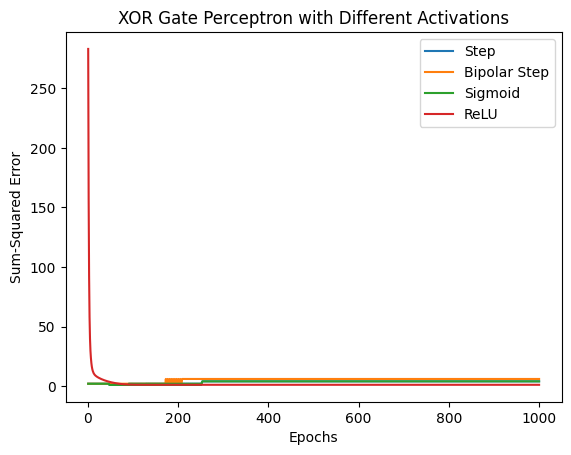

In [22]:
# A5: Perceptron learning for XOR Gate with different activations

import numpy as np
import matplotlib.pyplot as plt

# Step activation
def step_activation(z):
    return 1 if z >= 0 else 0

# Bipolar Step activation
def bipolar_step_activation(z):
    return 1 if z >= 0 else -1

# Sigmoid activation
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

# ReLU activation
def relu_activation(z):
    return max(0, z)

# Generic perceptron trainer
def train_perceptron(input_data, target_labels, activation_func, learning_rate=0.05, max_iterations=1000, tolerance=0.002):
    weight_vector = np.array([0.2, -0.75])   # Initial weights
    bias_value = 10                          # Initial bias
    epoch_errors = []                        # Store errors per epoch

    for iteration in range(max_iterations):
        cumulative_error = 0
        for feature_vector, target in zip(input_data, target_labels):
            net_input = np.dot(feature_vector, weight_vector) + bias_value    # Weighted sum
            predicted_output = activation_func(net_input)                     # Activation output

            # For sigmoid, threshold at 0.5
            if activation_func == sigmoid_activation:
                predicted_output = 1 if predicted_output >= 0.5 else 0

            error_value = target - predicted_output                           # Error
            weight_vector += learning_rate * error_value * feature_vector     # Update weights
            bias_value += learning_rate * error_value                         # Update bias
            cumulative_error += error_value**2                                # Sum squared error

        epoch_errors.append(cumulative_error)
        if cumulative_error <= tolerance:                                     # Stop if converged
            break

    return weight_vector, bias_value, epoch_errors, iteration + 1


if __name__ == "__main__":
    # XOR gate truth table
    input_vectors = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    target_outputs = np.array([0, 1, 1, 0])

    # Train with Step
    weights_step, bias_step, errors_step, epochs_step = train_perceptron(input_vectors, target_outputs, step_activation)
    print("Step → Epochs:", epochs_step)

    # Train with Bipolar Step
    weights_bipolar, bias_bipolar, errors_bipolar, epochs_bipolar = train_perceptron(input_vectors, target_outputs, bipolar_step_activation)
    print("Bipolar Step → Epochs:", epochs_bipolar)

    # Train with Sigmoid
    weights_sigmoid, bias_sigmoid, errors_sigmoid, epochs_sigmoid = train_perceptron(input_vectors, target_outputs, sigmoid_activation)
    print("Sigmoid → Epochs:", epochs_sigmoid)

    # Train with ReLU
    weights_relu, bias_relu, errors_relu, epochs_relu = train_perceptron(input_vectors, target_outputs, relu_activation)
    print("ReLU → Epochs:", epochs_relu)

    # Plot errors
    plt.plot(range(1, len(errors_step) + 1), errors_step, label="Step")
    plt.plot(range(1, len(errors_bipolar) + 1), errors_bipolar, label="Bipolar Step")
    plt.plot(range(1, len(errors_sigmoid) + 1), errors_sigmoid, label="Sigmoid")
    plt.plot(range(1, len(errors_relu) + 1), errors_relu, label="ReLU")
    plt.xlabel("Epochs")
    plt.ylabel("Sum-Squared Error")
    plt.title("XOR Gate Perceptron with Different Activations")
    plt.legend()
    plt.show()

**A6: Customer transaction classification with Perceptron (Sigmoid activation + Normalization)**

In [23]:
# A6: Customer transaction classification with Perceptron (Sigmoid activation + Normalization)

import numpy as np

# Sigmoid activation with overflow-safe implementation
def sigmoid_fn(z_val):
    return 1 / (1 + np.exp(-np.clip(z_val, -250, 250)))  # clip avoids overflow

# Perceptron training
def train_perceptron_txn(features, labels, lr=0.1, max_iter=1000, tolerance=0.002):
    coeffs = np.random.rand(features.shape[1])  # Random initial weights
    intercept = np.random.rand()                # Random initial bias
    error_track = []

    for iter_idx in range(max_iter):
        sq_error_sum = 0
        for sample, actual in zip(features, labels):
            linear_out = np.dot(sample, coeffs) + intercept   # Weighted sum
            act_out = sigmoid_fn(linear_out)                  # Sigmoid output
            predicted = 1 if act_out >= 0.5 else 0            # Threshold at 0.5
            diff = actual - predicted                         # Error
            coeffs += lr * diff * sample                      # Update weights
            intercept += lr * diff                            # Update bias
            sq_error_sum += diff**2                           # Sum squared error
        error_track.append(sq_error_sum)
        if sq_error_sum <= tolerance:                        # Convergence check
            break
    return coeffs, intercept, error_track, iter_idx+1

if __name__ == "__main__":
    # Customer dataset
    data_matrix = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ])
    class_labels = np.array([1,1,1,0,1,0,1,1,0,0])  # High Value Yes=1, No=0

    # Min-Max normalization (scale features 0–1)
    norm_matrix = (data_matrix - data_matrix.min(axis=0)) / (data_matrix.max(axis=0) - data_matrix.min(axis=0))

    # Train perceptron
    final_coeffs, final_intercept, err_list, total_iters = train_perceptron_txn(norm_matrix, class_labels)

    print("Final Coefficients:", final_coeffs)
    print("Final Intercept:", final_intercept)
    print("Iterations Taken:", total_iters)

Final Coefficients: [0.23307258 0.20058449 0.29490985 0.82678893]
Final Intercept: -0.5876608893217238
Iterations Taken: 6


**A7: Compare Perceptron vs Pseudo-Inverse on Customer Dataset**

In [24]:
# A7: Compare Perceptron vs Pseudo-Inverse on Customer Dataset

import numpy as np

# Sigmoid activation with safe exp
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# Perceptron training (same as A6 but renamed variables)
def train_perceptron_clients(feature_set, labels, lr=0.1, max_iter=1000, tolerance=0.002):
    coeffs = np.random.rand(feature_set.shape[1])   # Random initial weights
    intercept = np.random.rand()                    # Random initial bias
    err_history = []

    for iter_idx in range(max_iter):
        sum_err = 0
        for sample_vec, actual_val in zip(feature_set, labels):
            lin_out = np.dot(sample_vec, coeffs) + intercept   # Weighted sum
            act_out = sigmoid_fn(lin_out)                      # Sigmoid output
            predicted = 1 if act_out >= 0.5 else 0             # Threshold
            diff = actual_val - predicted                      # Error
            coeffs += lr * diff * sample_vec                   # Update weights
            intercept += lr * diff                             # Update bias
            sum_err += diff**2
        err_history.append(sum_err)
        if sum_err <= tolerance:
            break
    return coeffs, intercept

# Pseudo-inverse solution
def pinv_solution(feature_set, labels):
    feat_bias = np.c_[np.ones((feature_set.shape[0],1)), feature_set]  # Add bias
    weight_vec = np.linalg.pinv(feat_bias) @ labels                    # Compute weights
    return weight_vec

if __name__ == "__main__":
    # Customer dataset
    cust_data = np.array([
        [20,6,2,386],
        [16,3,6,289],
        [27,6,2,393],
        [19,1,2,110],
        [24,4,2,280],
        [22,1,5,167],
        [15,4,2,271],
        [18,4,2,274],
        [21,1,4,148],
        [16,2,4,198]
    ])
    cust_labels = np.array([1,1,1,0,1,0,1,1,0,0])

    # Normalize dataset
    norm_data = (cust_data - cust_data.min(axis=0)) / (cust_data.max(axis=0) - cust_data.min(axis=0))

    # Train perceptron
    coeffs_p, intercept_p = train_perceptron_clients(norm_data, cust_labels)
    preds_perceptron = [1 if sigmoid_fn(np.dot(vec, coeffs_p) + intercept_p) >= 0.5 else 0 for vec in norm_data]

    # Solve using pseudo-inverse
    pinv_weights = pinv_solution(norm_data, cust_labels)
    preds_pinv = [1 if res >= 0.5 else 0 for res in (np.c_[np.ones((norm_data.shape[0],1)), norm_data] @ pinv_weights)]

    # Print results
    print("Perceptron Predictions:", preds_perceptron)
    print("Pseudo-Inverse Predictions:", preds_pinv)

Perceptron Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Pseudo-Inverse Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


**A8: Backpropagation for AND Gate with Sigmoid activation**

Epochs Taken: 1000
Final Error: 0.16655053180429896
Predictions: [0. 0. 0. 0.]


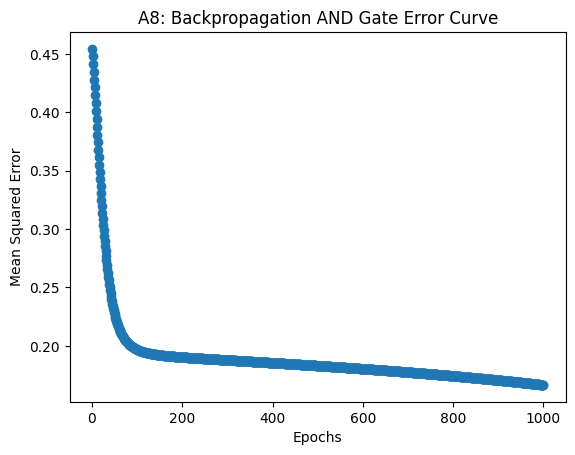

In [25]:
# A8: Backpropagation for AND Gate with Sigmoid activation + Error Plot

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# Derivative of sigmoid
def sigmoid_grad(val):
    return val * (1 - val)

# Backpropagation training
def backprop_and_gate(data_in, labels, hidden_units=2, lr=0.05, max_iter=1000, tolerance=0.002):
    np.random.seed(42)
    input_units = data_in.shape[1]
    output_units = 1

    # Initialize weights and biases
    w_hidden = np.random.rand(input_units, hidden_units)
    b_hidden = np.random.rand(hidden_units)
    w_output = np.random.rand(hidden_units, output_units)
    b_output = np.random.rand(output_units)

    loss_history = []

    for iter_idx in range(max_iter):
        # Forward pass
        net_hidden = np.dot(data_in, w_hidden) + b_hidden
        act_hidden = sigmoid_fn(net_hidden)
        net_output = np.dot(act_hidden, w_output) + b_output
        act_output = sigmoid_fn(net_output)

        # Error calculation
        err = labels - act_output
        mse = np.mean(err**2)
        loss_history.append(mse)

        # Backward pass
        grad_output = err * sigmoid_grad(act_output)
        grad_hidden = grad_output.dot(w_output.T) * sigmoid_grad(act_hidden)

        # Update weights and biases
        w_output += act_hidden.T.dot(grad_output) * lr
        b_output += np.sum(grad_output, axis=0) * lr
        w_hidden += data_in.T.dot(grad_hidden) * lr
        b_hidden += np.sum(grad_hidden, axis=0) * lr

        # Convergence check
        if mse <= tolerance:
            break

    return w_hidden, b_hidden, w_output, b_output, loss_history, iter_idx+1


if __name__ == "__main__":
    # AND gate truth table
    input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
    target_labels = np.array([[0],[0],[0],[1]])

    # Train network
    w_hid, b_hid, w_out, b_out, loss_vals, num_epochs = backprop_and_gate(input_data, target_labels)

    # Predictions
    predictions = np.round(sigmoid_fn(np.dot(sigmoid_fn(np.dot(input_data, w_hid) + b_hid), w_out) + b_out).flatten())

    print("Epochs Taken:", num_epochs)
    print("Final Error:", loss_vals[-1])
    print("Predictions:", predictions)

    # Plot error vs epochs
    plt.plot(range(1, len(loss_vals)+1), loss_vals, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A8: Backpropagation AND Gate Error Curve")
    plt.show()

**A9: Backpropagation for XOR Gate with Sigmoid activation**

Epochs Taken: 1000
Final Error: 0.24978859572114492
Predictions: [0. 1. 0. 1.]


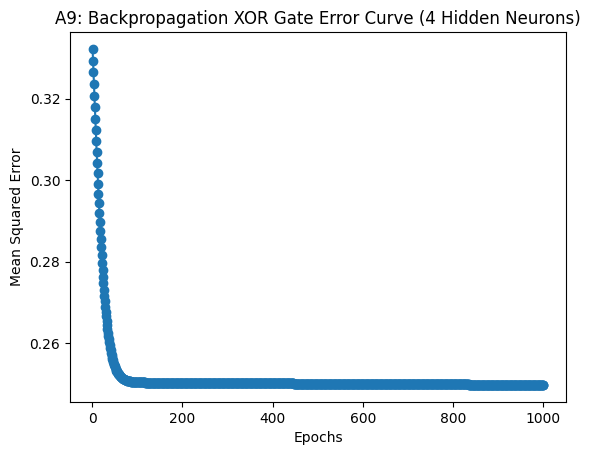

In [26]:
# A9: Backpropagation for XOR Gate with Sigmoid activation + Error Plot

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# Derivative of sigmoid
def sigmoid_grad(val):
    return val * (1 - val)

# Backpropagation training for XOR
def backprop_xor_gate(data_in, labels, hidden_units=4, lr=0.05, max_iter=1000, tolerance=0.002):
    np.random.seed(42)
    input_units = data_in.shape[1]
    output_units = 1

    # Initialize weights and biases
    w_hidden = np.random.rand(input_units, hidden_units)
    b_hidden = np.random.rand(hidden_units)
    w_output = np.random.rand(hidden_units, output_units)
    b_output = np.random.rand(output_units)

    loss_history = []

    for iter_idx in range(max_iter):
        # Forward pass
        net_hidden = np.dot(data_in, w_hidden) + b_hidden
        act_hidden = sigmoid_fn(net_hidden)
        net_output = np.dot(act_hidden, w_output) + b_output
        act_output = sigmoid_fn(net_output)

        # Error calculation
        err = labels - act_output
        mse = np.mean(err**2)
        loss_history.append(mse)

        # Backward pass
        grad_output = err * sigmoid_grad(act_output)
        grad_hidden = grad_output.dot(w_output.T) * sigmoid_grad(act_hidden)

        # Update weights and biases
        w_output += act_hidden.T.dot(grad_output) * lr
        b_output += np.sum(grad_output, axis=0) * lr
        w_hidden += data_in.T.dot(grad_hidden) * lr
        b_hidden += np.sum(grad_hidden, axis=0) * lr

        # Convergence check
        if mse <= tolerance:
            break

    return w_hidden, b_hidden, w_output, b_output, loss_history, iter_idx+1


if __name__ == "__main__":
    # XOR gate truth table
    input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
    target_labels = np.array([[0],[1],[1],[0]])

    # Train network
    w_hid, b_hid, w_out, b_out, loss_vals, num_epochs = backprop_xor_gate(input_data, target_labels)

    # Predictions
    predictions = np.round(sigmoid_fn(np.dot(sigmoid_fn(np.dot(input_data, w_hid) + b_hid), w_out) + b_out).flatten())

    print("Epochs Taken:", num_epochs)
    print("Final Error:", loss_vals[-1])
    print("Predictions:", predictions)

    # Plot error vs epochs
    plt.plot(range(1, len(loss_vals)+1), loss_vals, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A9: Backpropagation XOR Gate Error Curve (4 Hidden Neurons)")
    plt.show()

**A10: Perceptron/Backprop with 2 output nodes for Logic Gates**

Epochs Taken: 1000
Final Error: 0.18074313527236074
Predictions (Probabilities):
 [[0.73582269 0.2575725 ]
 [0.71960019 0.28447381]
 [0.73023834 0.27676098]
 [0.71537574 0.30075713]]
Predictions (Binary):
 [[1 0]
 [1 0]
 [1 0]
 [1 0]]


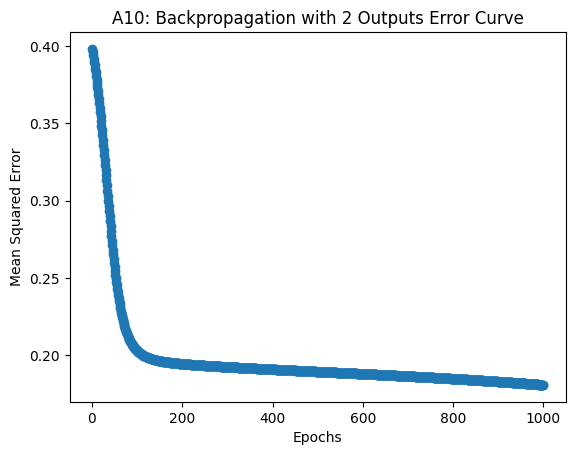

In [27]:
# A10: Backpropagation with 2 output nodes + Error Plot

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# Derivative of sigmoid
def sigmoid_grad(val):
    return val * (1 - val)

# Backpropagation training for 2-output network
def backprop_two_outputs(data_in, labels, hidden_units=2, lr=0.05, max_iter=1000, tolerance=0.002):
    np.random.seed(42)
    input_units = data_in.shape[1]
    output_units = labels.shape[1]

    # Initialize weights and biases
    w_hidden = np.random.rand(input_units, hidden_units)
    b_hidden = np.random.rand(hidden_units)
    w_output = np.random.rand(hidden_units, output_units)
    b_output = np.random.rand(output_units)

    loss_history = []

    for iter_idx in range(max_iter):
        # Forward pass
        net_hidden = np.dot(data_in, w_hidden) + b_hidden
        act_hidden = sigmoid_fn(net_hidden)
        net_output = np.dot(act_hidden, w_output) + b_output
        act_output = sigmoid_fn(net_output)

        # Error calculation
        err = labels - act_output
        mse = np.mean(err**2)
        loss_history.append(mse)

        # Backward pass
        grad_output = err * sigmoid_grad(act_output)
        grad_hidden = grad_output.dot(w_output.T) * sigmoid_grad(act_hidden)

        # Update weights and biases
        w_output += act_hidden.T.dot(grad_output) * lr
        b_output += np.sum(grad_output, axis=0) * lr
        w_hidden += data_in.T.dot(grad_hidden) * lr
        b_hidden += np.sum(grad_hidden, axis=0) * lr

        # Convergence check
        if mse <= tolerance:
            break

    return w_hidden, b_hidden, w_output, b_output, loss_history, iter_idx+1


if __name__ == "__main__":
    # Input data and target labels (2-output network)
    input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
    target_labels = np.array([[1,0],[1,0],[1,0],[0,1]])

    # Train network
    w_hid, b_hid, w_out, b_out, loss_vals, num_epochs = backprop_two_outputs(input_data, target_labels)

    # Predictions
    preds_prob = sigmoid_fn(np.dot(sigmoid_fn(np.dot(input_data, w_hid) + b_hid), w_out) + b_out)
    preds_binary = (preds_prob == preds_prob.max(axis=1, keepdims=True)).astype(int)

    print("Epochs Taken:", num_epochs)
    print("Final Error:", loss_vals[-1])
    print("Predictions (Probabilities):\n", preds_prob)
    print("Predictions (Binary):\n", preds_binary)

    # Plot error vs epochs
    plt.plot(range(1, len(loss_vals)+1), loss_vals, marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("A10: Backpropagation with 2 Outputs Error Curve")
    plt.show()

**A11: Using sklearn MLPClassifier for AND and XOR Gates**

In [28]:
# A11: Using sklearn MLPClassifier for AND and XOR Gates

import numpy as np
from sklearn.neural_network import MLPClassifier

# AND gate truth table
input_and = np.array([[0,0],[0,1],[1,0],[1,1]])
labels_and = np.array([0,0,0,1])

# XOR gate truth table
input_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
labels_xor = np.array([0,1,1,0])

# Train MLP for AND gate
mlp_model_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                              learning_rate_init=0.1, max_iter=1000, random_state=42)
mlp_model_and.fit(input_and, labels_and)
predictions_and = mlp_model_and.predict(input_and)

# Train MLP for XOR gate
mlp_model_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd',
                              learning_rate_init=0.1, max_iter=1000, random_state=42)
mlp_model_xor.fit(input_xor, labels_xor)
predictions_xor = mlp_model_xor.predict(input_xor)

# Print results
print("AND Gate Predictions:", predictions_and)
print("XOR Gate Predictions:", predictions_xor)

AND Gate Predictions: [0 0 0 1]
XOR Gate Predictions: [0 0 1 0]


**A12: Using MLPClassifier on Fluency Dataset**

In [29]:
# A12: Using MLPClassifier on Fluency Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
fluency_df = pd.read_csv("processed_fluency_dataset.csv")

# Separate features and target
target_fluency = fluency_df['fluency']  # Target column

# Automatically select only numeric columns for features
features_numeric = fluency_df.select_dtypes(include=[np.number])

# Encode target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target_fluency)

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target_encoded, test_size=0.2, random_state=42
)

# Define MLPClassifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(10, 10),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)

# Train model
mlp_model.fit(X_train, y_train)

# Predictions
predictions_test = mlp_model.predict(X_test)

# Print results
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_test))
print("\nClassification Report:\n", classification_report(y_test, predictions_test, target_names=label_encoder.classes_))

Confusion Matrix:
 [[181   0   0]
 [  0  21   0]
 [  0   0 324]]

Classification Report:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00       181
      Fluent       1.00      1.00      1.00        21
        Poor       1.00      1.00      1.00       324

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526



**Optional Questions**

**O1: Vary learning rate for Sigmoid and ReLU activations**

Sigmoid: [68, 23, 19, 15, 13]
ReLU: [187, 49, 21, 1000, 234]


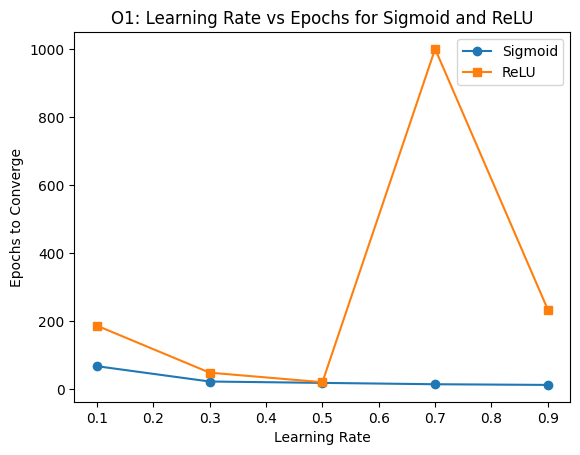

In [30]:
# O1: Vary learning rate for Sigmoid and ReLU activations

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# ReLU activation
def relu_fn(val):
    return max(0, val)

# Generic perceptron trainer
def train_perceptron_lr(data_in, labels, activation_fn, lr, max_iter=1000, tolerance=0.002):
    weights = np.array([0.2, -0.75])  # Initial weights
    bias = 10                          # Initial bias

    for iter_idx in range(max_iter):
        total_error = 0
        for x_sample, y_target in zip(data_in, labels):
            net_input = np.dot(x_sample, weights) + bias
            output_val = activation_fn(net_input)
            if activation_fn == sigmoid_fn:  # Sigmoid threshold
                output_val = 1 if output_val >= 0.5 else 0
            error = y_target - output_val
            weights += lr * error * x_sample
            bias += lr * error
            total_error += error**2
        if total_error <= tolerance:
            return iter_idx + 1
    return max_iter


if __name__ == "__main__":
    # Input and target for AND gate
    input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
    target_labels = np.array([0,0,0,1])

    learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]

    epochs_sigmoid = [train_perceptron_lr(input_data, target_labels, sigmoid_fn, lr) for lr in learning_rates]
    epochs_relu = [train_perceptron_lr(input_data, target_labels, relu_fn, lr) for lr in learning_rates]

    print("Sigmoid:", epochs_sigmoid)
    print("ReLU:", epochs_relu)

    # Plot learning rate vs epochs
    plt.plot(learning_rates, epochs_sigmoid, marker='o', label="Sigmoid")
    plt.plot(learning_rates, epochs_relu, marker='s', label="ReLU")
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("O1: Learning Rate vs Epochs for Sigmoid and ReLU")
    plt.legend()
    plt.show()

**O2: Try other activations (TanH, Leaky ReLU) and repeat O1**

TanH: [1000, 1000, 1000, 1000, 1000]
Leaky ReLU: [207, 54, 23, 58, 1000]


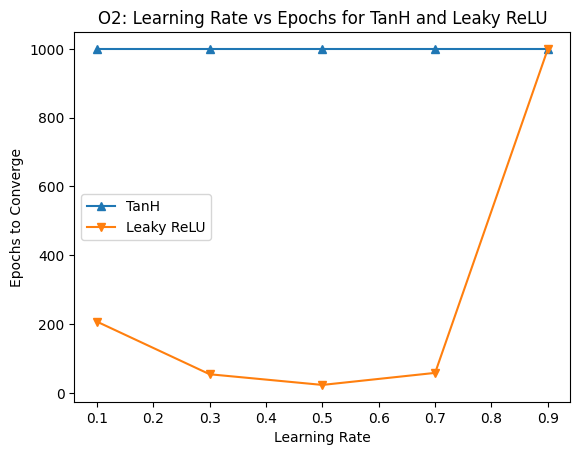

In [31]:
# O2: Vary learning rate for TanH and Leaky ReLU activations

import numpy as np
import matplotlib.pyplot as plt

# TanH activation
def tanh_fn(val):
    return np.tanh(val)

# Leaky ReLU activation
def leaky_relu_fn(val, alpha=0.01):
    return val if val > 0 else alpha * val

# Train with TanH
epochs_tanh = [train_perceptron_lr(input_data, target_labels, tanh_fn, lr) for lr in learning_rates]

# Train with Leaky ReLU
epochs_leaky = [train_perceptron_lr(input_data, target_labels, lambda v: leaky_relu_fn(v), lr) for lr in learning_rates]

print("TanH:", epochs_tanh)
print("Leaky ReLU:", epochs_leaky)

# Plot learning rate vs epochs
plt.plot(learning_rates, epochs_tanh, marker='^', label="TanH")
plt.plot(learning_rates, epochs_leaky, marker='v', label="Leaky ReLU")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.title("O2: Learning Rate vs Epochs for TanH and Leaky ReLU")
plt.legend()
plt.show()

**O3: Vary learning rate & activations for A7 (pseudo-inverse) and A8 (backprop)**

In [32]:
# O3: Compare convergence with different LR and activations in A7 & A8

import numpy as np

# Safe Sigmoid activation
def sigmoid_fn(val):
    return 1 / (1 + np.exp(-np.clip(val, -250, 250)))

# Train backpropagation for AND gate with proper shapes
def train_backprop_and_gate(input_data, target_labels, hidden_neurons=2, learning_rate=0.05, max_iter=1000, tolerance=0.002):
    np.random.seed(42)                                   # fix randomness
    input_data = np.array(input_data, dtype=float)       # ensure float array
    target_labels = np.array(target_labels, dtype=float).reshape(-1, 1)  # column vector (n,1)
    n_samples, n_features = input_data.shape            # get sizes

    # Initialize weights and biases
    weights_input_hidden = np.random.rand(n_features, hidden_neurons)  # (input, hidden)
    bias_hidden = np.random.rand(1, hidden_neurons)                     # (1, hidden)
    weights_hidden_output = np.random.rand(hidden_neurons, 1)           # (hidden, output=1)
    bias_output = np.random.rand(1, 1)                                  # (1,1)

    for iter_idx in range(max_iter):
        hidden_input = np.dot(input_data, weights_input_hidden) + bias_hidden  # (n, hidden)
        hidden_output = sigmoid_fn(hidden_input)                               # (n, hidden)
        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output # (n,1)
        network_output = sigmoid_fn(final_input)                                # (n,1)

        error = target_labels - network_output
        mse = np.mean(error**2)
        if mse <= tolerance:
            return iter_idx + 1

        # Backpropagation
        delta_output = error * network_output * (1 - network_output)           # (n,1)
        delta_hidden = np.dot(delta_output, weights_hidden_output.T) * hidden_output * (1 - hidden_output)  # (n, hidden)

        # Update weights and biases
        weights_hidden_output += np.dot(hidden_output.T, delta_output) * learning_rate
        bias_output += np.sum(delta_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden += np.dot(input_data.T, delta_hidden) * learning_rate
        bias_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * learning_rate

    return max_iter  # return max if not converged


if __name__ == "__main__":
    # AND gate dataset
    and_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    and_targets = np.array([0,0,0,1])

    learning_rates = [0.1, 0.3, 0.5]  # Learning rates to test
    for lr in learning_rates:
        epochs_taken = train_backprop_and_gate(and_inputs, and_targets, learning_rate=lr)
        print(f"Learning Rate={lr} → Backprop Epochs={epochs_taken}")

Learning Rate=0.1 → Backprop Epochs=1000
Learning Rate=0.3 → Backprop Epochs=1000
Learning Rate=0.5 → Backprop Epochs=1000
